# Exercise 6.4: Linear Regression Analysis
## NYC Healthcare Access Equity Analysis

This notebook performs a supervised machine learning regression analysis to test whether median household income can predict diabetes prevalence across NYC census tracts.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn

In [2]:
# Import scikit-learn modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load master dataset
master = pd.read_csv('/Users/jessduong/Documents/CF/Achievement 6/02 data/prepared data/nyc_health_master.csv')

In [4]:
# Check shape and missing values
print(master.shape)
print(master[['median_income', 'diabetes_pct']].isnull().sum())

(10699, 14)
median_income    0
diabetes_pct     0
dtype: int64


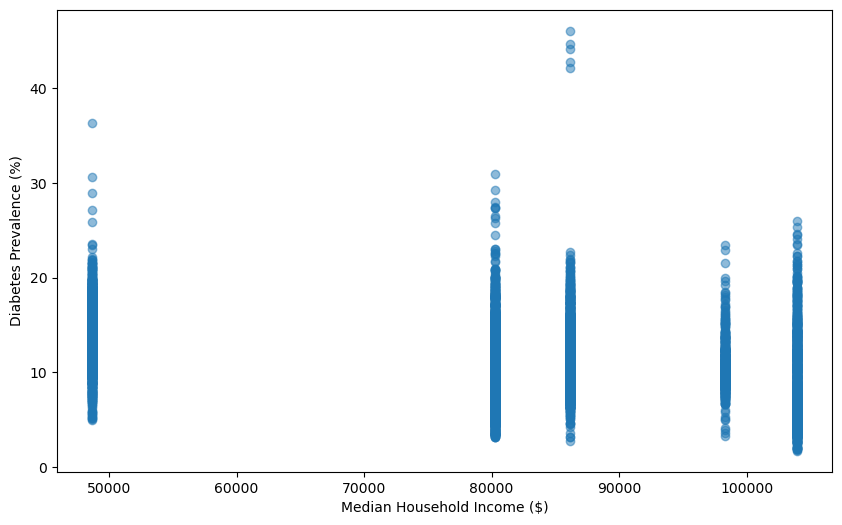

In [22]:
# Scatterplot: Median Income vs Diabetes Prevalence
# Visualize the relationship between the two variables before running regression

plt.figure(figsize=(10, 6))  # Set figure size
plt.scatter(master['median_income'], master['diabetes_pct'], alpha=0.5)  # Create scatterplot with transparency
plt.xlabel('Median Household Income ($)')  # Label x-axis
plt.ylabel('Diabetes Prevalence (%)')
plt.savefig('/Users/jessduong/Documents/CF/Achievement 6/04 analysis/visualizations/median_income_vs_diabetes_prevalence_scatterplot.png', dpi=150, bbox_inches='tight')
plt.show()

### Scatterplot Observations

The scatterplot shows data clustering in vertical bands because income is measured at the borough level (5 values) while diabetes is measured at the census tract level. Despite the clustering, a general downward trend is visible — lower income areas tend to have higher diabetes rates. This supports testing income as a predictor of diabetes prevalence. The full multi-year dataset (10,699 observations) is used to meet the 5,000 minimum requirement for predictive analysis.

## Hypothesis

**"Higher median household income predicts lower diabetes prevalence across NYC census tracts."**

Based on exploratory analysis in Exercise 6.2, median income showed a strong negative correlation with diabetes prevalence. This regression will test whether income can reliably predict diabetes rates.

In [8]:
# Define independent variable (X) and dependent variable (y)
# Reshape into NumPy arrays as required by scikit-learn

X = master['median_income'].values.reshape(-1, 1)  # Independent variable (must be 2D array)
y = master['diabetes_pct'].values  # Dependent variable (1D array)

# Check the shapes
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (10699, 1)
y shape: (10699,)


In [9]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the sizes of each set
print('Training set size:', X_train.shape[0])
print('Test set size:', X_test.shape[0])

Training set size: 7489
Test set size: 3210


In [10]:
# Create a regression object
regression = LinearRegression() # this is the regression onject we will fit onto the training set

In [11]:
# Fit the regression model to the training dataset
regression.fit(X_train, y_train)

LinearRegression()

In [12]:
# Use the model to predict y values on the test set
y_predicted = regression.predict(X_test)

print('Model trained and predictions created.')

Model trained and predictions created.


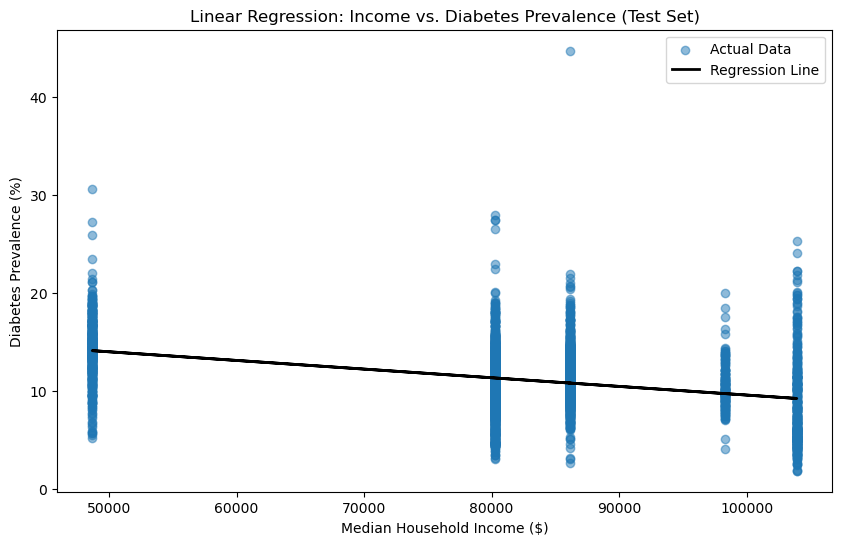

In [23]:
# Plot the regression line on the test set
plt.figure(figsize=(10, 6))  # Set figure size
plt.scatter(X_test, y_test, alpha=0.5, label='Actual Data')  # Plot actual test data points
plt.plot(X_test, y_predicted, color='black', linewidth=2, label='Regression Line')  # Plot regression line
plt.xlabel('Median Household Income ($)')  # Label x-axis
plt.ylabel('Diabetes Prevalence (%)')  # Label y-axis
plt.title('Linear Regression: Income vs. Diabetes Prevalence (Test Set)')  # Add title
plt.legend()  # Show legend
plt.savefig('/Users/jessduong/Documents/CF/Achievement 6/04 analysis/visualizations/linear_regression_income_scatterplot.png', dpi=150, bbox_inches='tight')
plt.show()

### Regression Line Interpretation

The regression line shows a negative slope, confirming that higher median income is associated with lower diabetes prevalence. However, many data points fall far from the line, particularly within each income cluster. This suggests that while income captures the general downward trend, it does not fully explain the wide variation in diabetes rates within individual boroughs. Other factors — such as access to healthy food, walkability, or cultural differences — likely contribute to the variation within each income group.

In [16]:
# Calculate model performance statistics
slope = regression.coef_[0]  # Regression coefficient (slope)
intercept = regression.intercept_  # Y-intercept
mse = mean_squared_error(y_test, y_predicted)  # Mean squared error
r2 = r2_score(y_test, y_predicted)  # R-squared score

In [17]:
# Print results
print('Slope:', round(slope, 6))
print('Intercept:', round(intercept, 4))
print('Mean Squared Error (MSE):', round(mse, 4))
print('R-squared (R2):', round(r2, 4))

Slope: -8.8e-05
Intercept: 18.4297
Mean Squared Error (MSE): 11.0304
R-squared (R2): 0.1595


In [18]:
# Create a dataframe comparing predicted and actual y values
comparison = pd.DataFrame({
    'Actual Diabetes %': round(pd.Series(y_test), 2),  # Actual values from test set
    'Predicted Diabetes %': round(pd.Series(y_predicted), 2)  # Predicted values from model
})

In [19]:
# Reset index for clean display
comparison = comparison.reset_index(drop=True)

In [20]:
# Show first 20 rows
comparison.head(20)

,Actual Diabetes %,Predicted Diabetes %
0,16.2,10.83
1,15.8,14.14
2,13.1,14.14
3,13.6,11.35
4,11.3,10.83
5,8.3,9.26
6,11.0,9.26
7,12.3,10.83
8,8.0,10.83
9,14.8,10.83


### Model Performance Summary

**Results:**
- Slope: -8.8e-05 (negative relationship confirmed)
- MSE: 11.03 (average prediction off by ~3.3 percentage points)
- R-squared: 0.16 (model explains only 16% of variance in diabetes rates)

**Interpretation:**
The regression confirms that higher income is associated with lower diabetes prevalence, supporting the hypothesis. However, with an R-squared of only 0.16, income alone is a weak predictor of diabetes at the census tract level. The predicted vs. actual comparison shows the model can only produce a limited number of unique predictions (based on borough income levels), while actual diabetes rates vary widely within each borough.

This suggests that diabetes prevalence is influenced by many factors beyond income alone, such as access to healthy food, neighborhood walkability, cultural factors, and healthcare quality. A multiple regression model with additional predictors would likely perform better.

**Data Bias Considerations:**
The income data is aggregated at the borough level while health outcomes are at the census tract level. This mismatch limits the model's ability to capture neighborhood-level income variation. Additionally, the dataset only covers NYC, so results may not generalize to other regions. The CDC PLACES health data is based on modeled estimates rather than direct measurements, which introduces its own potential for systematic error.

Notably, facility density showed weak correlation with health outcomes in Exercise 6.2, suggesting that simply having more healthcare facilities does not improve health outcomes. Income appears to be the stronger underlying driver; communities with higher income likely have better access to preventive care, healthier food options, and other resources that reduce diabetes risk, regardless of how many facilities are nearby.